# Árvores de Decisão

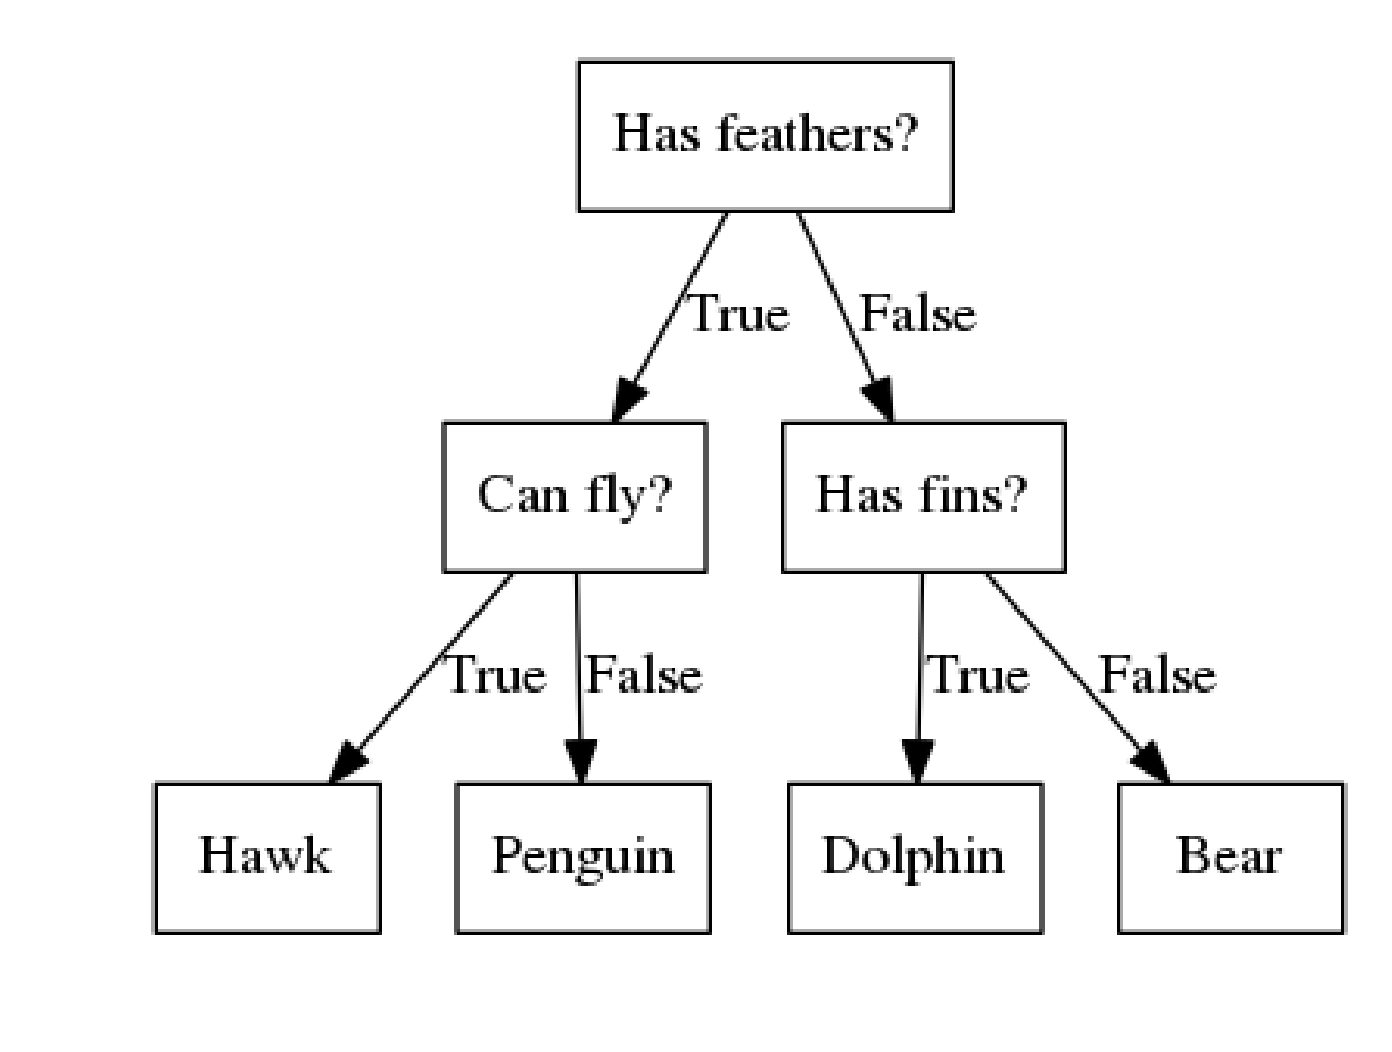

In [1]:
# Exemple de uma árvore de decisão
# feathers = Penas
# frins = Barbatanas
from IPython.display import Image 
Image(filename='ArvoreDeDecisao.png')

In [2]:
# Carregando o dataset sobre Cancer de Mama 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
#import config

cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
print("Tamanhado (shape) do dataset de cancer: {}".format(cancer.data.shape))

Tamanhado (shape) do dataset de cancer: (569, 30)


In [4]:
print("Numero de Exemplos por Classe:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Numero de Exemplos por Classe:
{'malignant': 212, 'benign': 357}


In [5]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.loc[:5, ['mean radius','mean texture', 'mean perimeter', 'mean area','mean smoothness','texture error', 'target'] ]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,texture error,target
0,17.99,10.38,122.80,1001.0,0.11840,0.9053,0
1,20.57,17.77,132.90,1326.0,0.08474,0.7339,0
2,19.69,21.25,130.00,1203.0,0.10960,0.7869,0
3,11.42,20.38,77.58,386.1,0.14250,1.1560,0
4,20.29,14.34,135.10,1297.0,0.10030,0.7813,0
5,12.45,15.70,82.57,477.1,0.12780,0.8902,0


In [7]:
df.target.value_counts() # 0 - Benigno | 1 - Maligno

1    357
0    212
Name: target, dtype: int64

In [8]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
X_train[:3]

array([[1.989e+01, 2.026e+01, 1.305e+02, 1.214e+03, 1.037e-01, 1.310e-01,
        1.411e-01, 9.431e-02, 1.802e-01, 6.188e-02, 5.079e-01, 8.737e-01,
        3.654e+00, 5.970e+01, 5.089e-03, 2.303e-02, 3.052e-02, 1.178e-02,
        1.057e-02, 3.391e-03, 2.373e+01, 2.523e+01, 1.605e+02, 1.646e+03,
        1.417e-01, 3.309e-01, 4.185e-01, 1.613e-01, 2.549e-01, 9.136e-02],
       [1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
        2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
        1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
        1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
        9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02],
       [1.714e+01, 1.640e+01, 1.160e+02, 9.127e+02, 1.186e-01, 2.276e-01,
        2.229e-01, 1.401e-01, 3.040e-01, 7.413e-02, 1.046e+00, 9.760e-01,
        7.276e+00, 1.114e+02, 8.029e-03, 3.799e-02, 3.732e-02, 2.397e-02,
        2.308e-02, 7.444e-03, 2.225e

In [9]:
cancer.target[:3]

array([0, 0, 0])

In [10]:
# aplicar o algoritmo de arvores de decisao
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


## Analisando a árvore de decisao

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [13]:
#!pip install graphviz

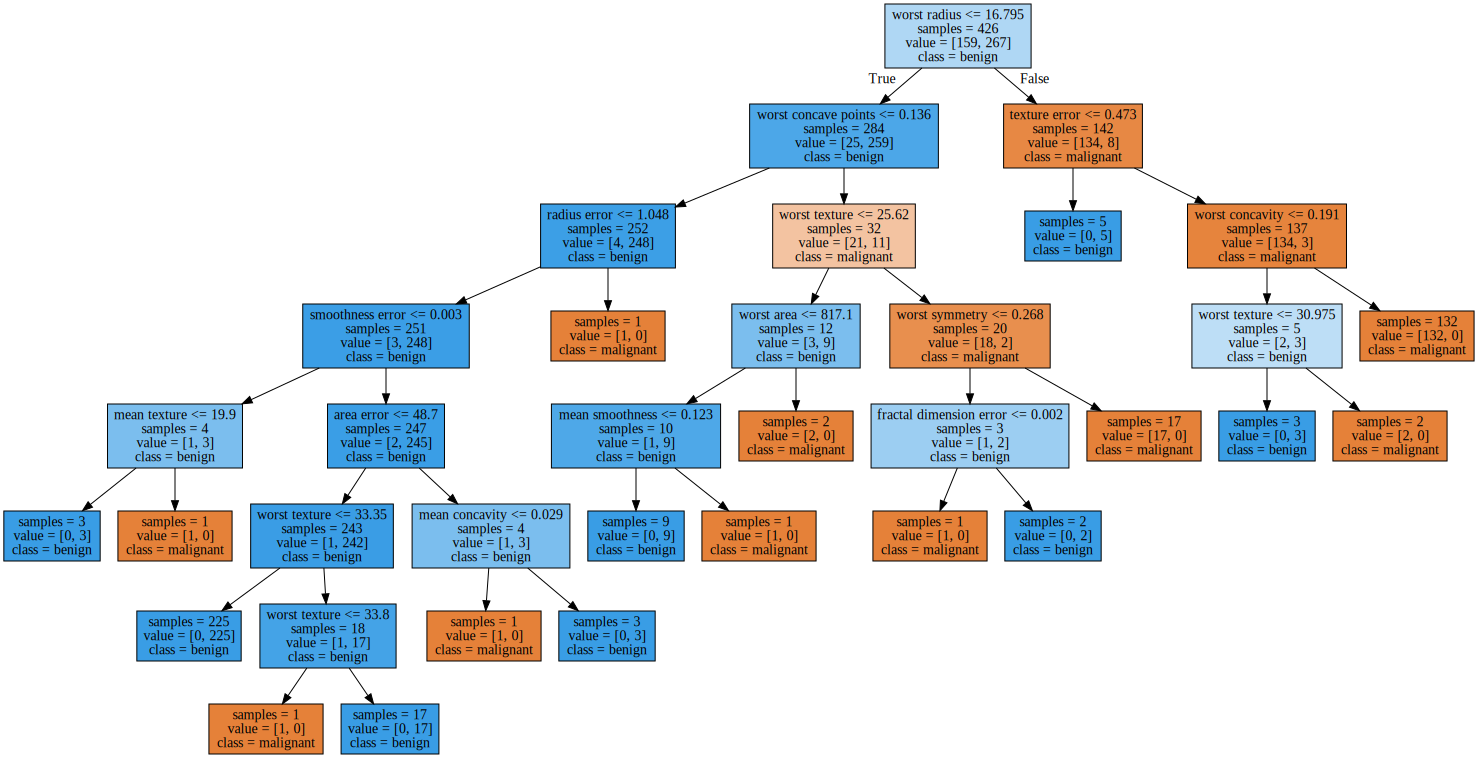

In [14]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
import graphviz
from IPython.display import set_matplotlib_formats, display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [15]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [24]:
dfi = pd.DataFrame()
dfi['Atributos'] = cancer.feature_names
dfi['Importancia'] = tree.feature_importances_
dfi = dfi.sort_values('Importancia', ascending=False)
dfi

,Atributos,Importancia
20,worst radius,0.695463
27,worst concave points,0.116844
21,worst texture,0.053832
11,texture error,0.046310
26,worst concavity,0.017403
23,worst area,0.013547
28,worst symmetry,0.011373
10,radius error,0.009757
4,mean smoothness,0.009031
6,mean concavity,0.007526


In [25]:
atributos = dfi.loc[:,'Atributos']
atributos

20               worst radius
27       worst concave points
21              worst texture
11              texture error
26            worst concavity
23                 worst area
28             worst symmetry
10               radius error
4             mean smoothness
6              mean concavity
1                mean texture
19    fractal dimension error
13                 area error
14           smoothness error
25          worst compactness
24           worst smoothness
22            worst perimeter
0                 mean radius
15          compactness error
18             symmetry error
17       concave points error
16            concavity error
12            perimeter error
9      mean fractal dimension
8               mean symmetry
7         mean concave points
5            mean compactness
3                   mean area
2              mean perimeter
29    worst fractal dimension
Name: Atributos, dtype: object

In [27]:
atributos10 = list(atributos[:10])
atributos10

['worst radius',
 'worst concave points',
 'worst texture',
 'texture error',
 'worst concavity',
 'worst area',
 'worst symmetry',
 'radius error',
 'mean smoothness',
 'mean concavity']

In [28]:

#atributos = ['worst radius', 'worst concave points', 'worst texture' ]
df2 = df.loc[:, atributos]
df2.head()

,worst radius,worst concave points,worst texture,texture error,worst concavity,worst area,worst symmetry,radius error,mean smoothness,mean concavity,...,concave points error,concavity error,perimeter error,mean fractal dimension,mean symmetry,mean concave points,mean compactness,mean area,mean perimeter,worst fractal dimension
0,25.38,0.2654,17.33,0.9053,0.7119,2019.0,0.4601,1.0950,0.11840,0.3001,...,0.01587,0.05373,8.589,0.07871,0.2419,0.14710,0.27760,1001.0,122.80,0.11890
1,24.99,0.1860,23.41,0.7339,0.2416,1956.0,0.2750,0.5435,0.08474,0.0869,...,0.01340,0.01860,3.398,0.05667,0.1812,0.07017,0.07864,1326.0,132.90,0.08902
2,23.57,0.2430,25.53,0.7869,0.4504,1709.0,0.3613,0.7456,0.10960,0.1974,...,0.02058,0.03832,4.585,0.05999,0.2069,0.12790,0.15990,1203.0,130.00,0.08758
3,14.91,0.2575,26.50,1.1560,0.6869,567.7,0.6638,0.4956,0.14250,0.2414,...,0.01867,0.05661,3.445,0.09744,0.2597,0.10520,0.28390,386.1,77.58,0.17300
4,22.54,0.1625,16.67,0.7813,0.4000,1575.0,0.2364,0.7572,0.10030,0.1980,...,0.01885,0.05688,5.438,0.05883,0.1809,0.10430,0.13280,1297.0,135.10,0.07678


Atributos mais relavantes


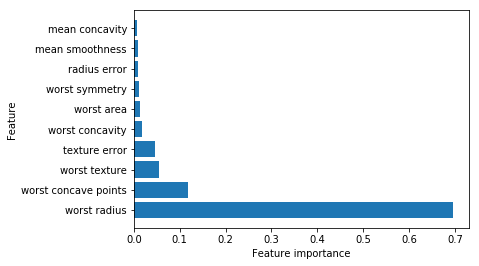

<Figure size 864x720 with 0 Axes>

In [19]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(dfi.Atributos[:10], dfi.Importancia[:10], align='center')
    #plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    #plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    
plot_feature_importances_cancer(tree)

In [20]:
np.sum(dfi.Importancia[:10])

0.9810854783873615

In [21]:
np.sum(dfi.Importancia[:5])

0.9298517073617381

In [22]:
np.sum(dfi.Importancia[:4])

0.912448588653045